In [20]:
#import functions
import mne
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report
from mne_bids.path import get_bids_path_from_fname
from ecog_preproc_utils import transformData
from GetData import getSubjects, getData

In [21]:
## Setup variables
data_dir = "/home/jovyan/ieegmovie_data/"
sess = 'iemu'
task = 'rest'
acq = 'clinical'
run = "1"

In [22]:
subjects=getSubjects(data_dir)

print(subjects)

['sub-07', 'sub-09', 'sub-14', 'sub-16', 'sub-18', 'sub-22', 'sub-24', 'sub-27', 'sub-41', 'sub-45', 'sub-46', 'sub-51', 'sub-55', 'sub-60']


In [75]:
for subj in subjects:
    try:
        subj_data=getData(subj, data_dir, sess, task, acq, run)
        bids_path=subj_data.getBidsPath()
        #get data
        hg_data=subj_data.getHGData().get_data()
        car_data=subj_data.getCARData().get_data()
        #get correlation matrix
        hg_corr = np.corrcoef(hg_data)
        car_corr= np.corrcoef(car_data)
        #save corr mat
        save_path=data_dir+"corr_maps/"
        hg_save= os.path.join(save_path+"HighGamma/", f'{bids_path.basename}_HG_corr.npy')
        car_save= os.path.join(save_path+"CAR/", f'{bids_path.basename}_CAR_corr.npy')
        np.save(hg_save, hg_corr)
        np.save(car_save, car_corr)
    except:
        print(subj+"not found")

Opening raw data file /home/jovyan/ieegmovie_data//derivatives/HighGamma/sub-07_ses-iemu_task-rest_acq-clinical_run-1_HG_raw.fif...
Isotrak not found
    Range : 0 ... 19587 =      0.000 ...   195.870 secs
Ready.
Opening raw data file /home/jovyan/ieegmovie_data//derivatives/CAR/sub-07_ses-iemu_task-rest_acq-clinical_run-1_CAR_raw.fif...
    Range : 0 ... 100291 =      0.000 ...   195.881 secs
Ready.
Opening raw data file /home/jovyan/ieegmovie_data//derivatives/HighGamma/sub-09_ses-iemu_task-rest_acq-clinical_run-1_HG_raw.fif...
sub-09not found
Opening raw data file /home/jovyan/ieegmovie_data//derivatives/HighGamma/sub-14_ses-iemu_task-rest_acq-clinical_run-1_HG_raw.fif...
Isotrak not found
    Range : 0 ... 18030 =      0.000 ...   180.300 secs
Ready.
Opening raw data file /home/jovyan/ieegmovie_data//derivatives/CAR/sub-14_ses-iemu_task-rest_acq-clinical_run-1_CAR_raw.fif...
    Range : 0 ... 92317 =      0.000 ...   180.307 secs
Ready.
Opening raw data file /home/jovyan/ieegmovie_

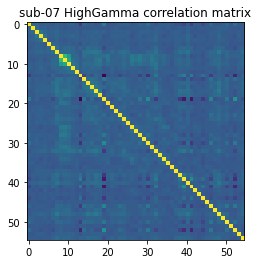

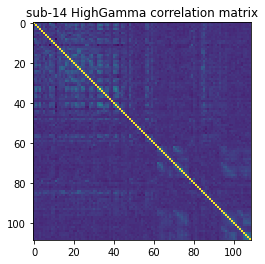

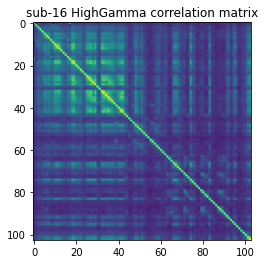

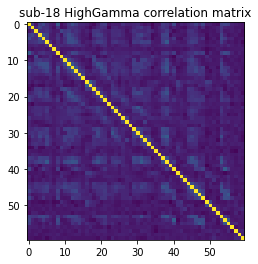

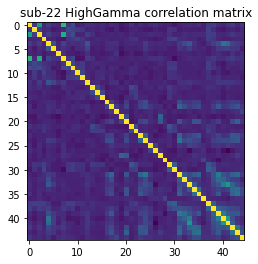

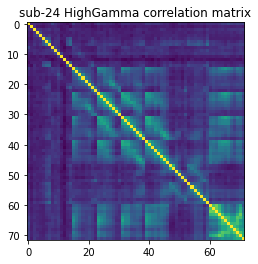

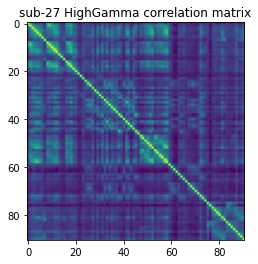

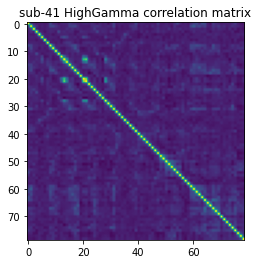

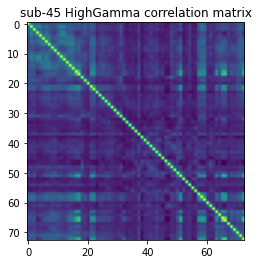

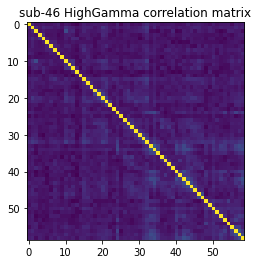

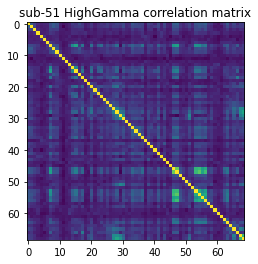

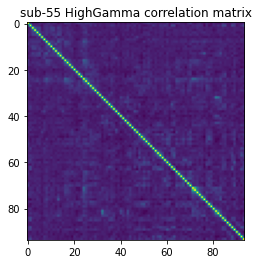

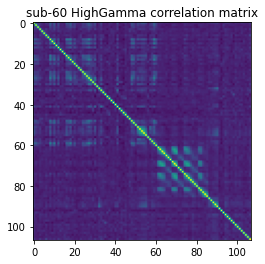

In [17]:
#plot HG corr
for file in os.listdir(data_dir+"corr_maps/HighGamma/"):
    name=data_dir+"corr_maps/HighGamma/"+file
    corr_dat=np.load(name)
    fig,ax= plt.subplots()
    ax.set_title(file[0:6] + " HighGamma correlation matrix")
    ax.imshow(corr_dat)
    

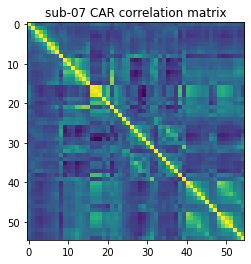

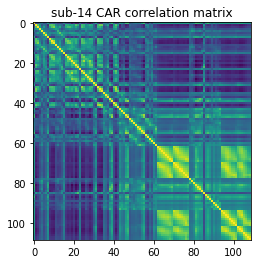

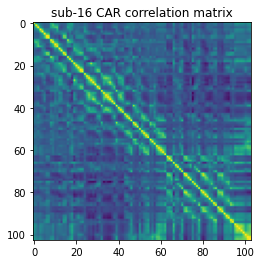

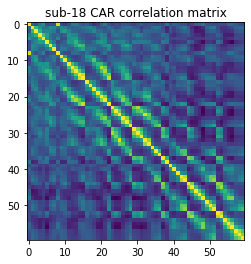

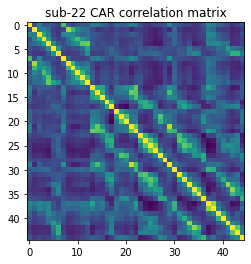

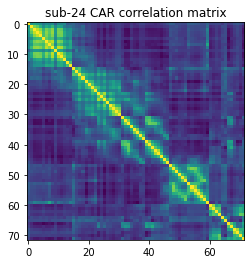

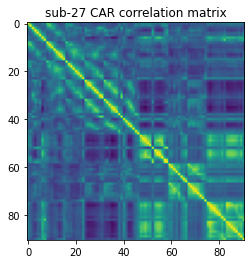

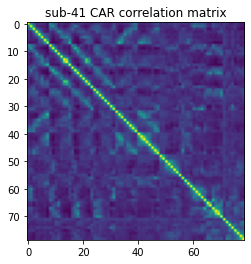

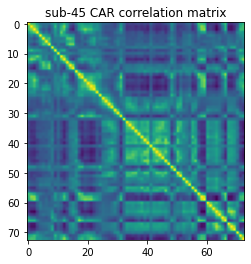

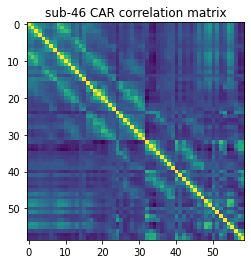

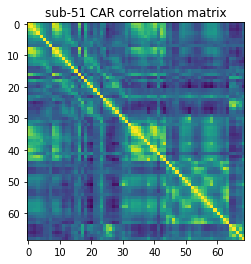

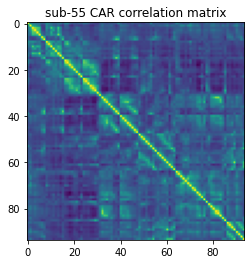

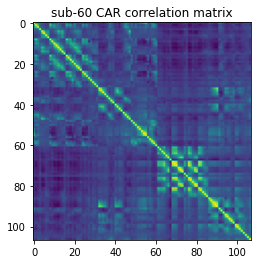

In [18]:
#plot CAR corr
for file in os.listdir(data_dir+"corr_maps/CAR/"):
    name=data_dir+"corr_maps/CAR/"+file
    corr_dat=np.load(name)
    fig,ax= plt.subplots()
    ax.set_title(file[0:6] + " CAR correlation matrix")
    ax.imshow(corr_dat)
    

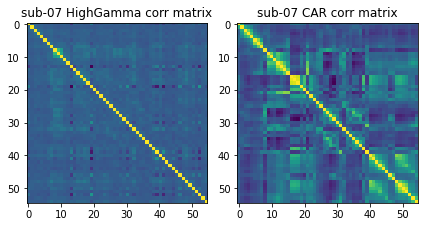

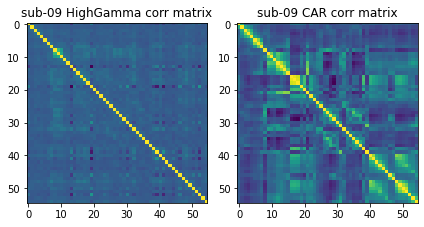

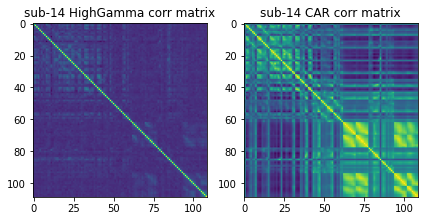

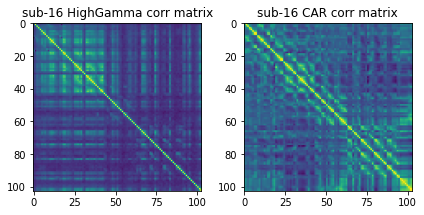

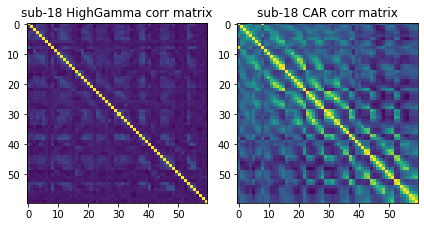

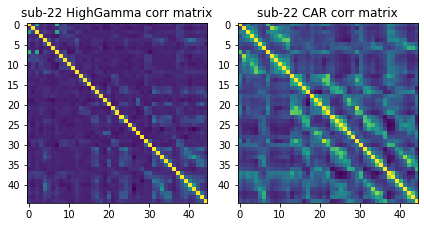

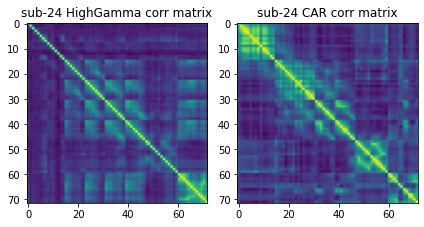

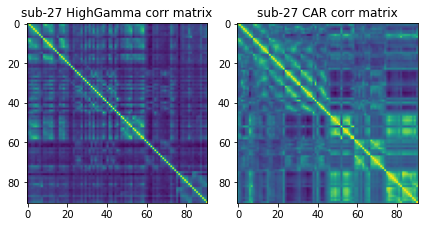

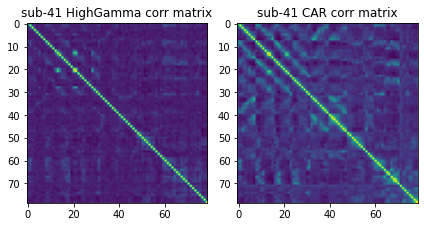

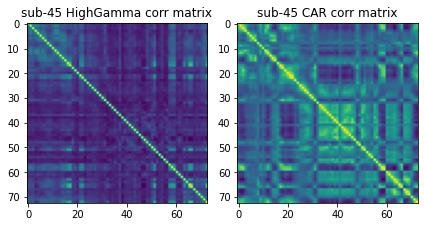

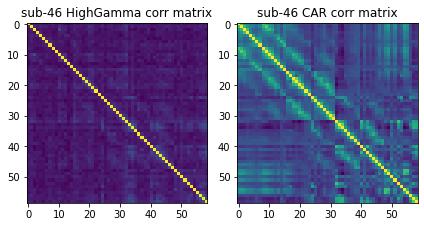

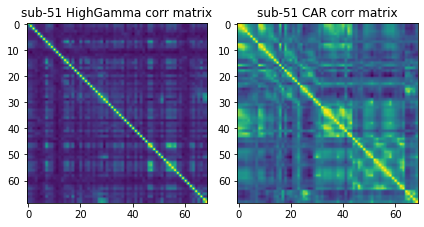

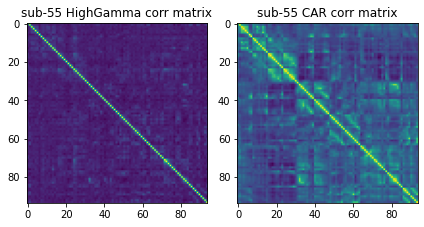

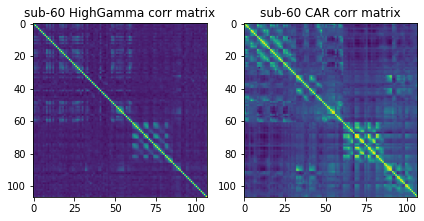

In [27]:
hg_dir=data_dir+"corr_maps/HighGamma/"
car_dir=data_dir+"corr_maps/CAR/"
for subj in subjects:
    for hgfile in os.listdir(hg_dir):
        if hgfile.startswith(subj):
            hg_dat=np.load(hg_dir+hgfile)
    for carfile in os.listdir(car_dir):
        if carfile.startswith(subj):
            car_dat=np.load(car_dir+carfile)
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(hg_dat)
    ax2.imshow(car_dat)
    ax1.set_title(subj + " HighGamma corr matrix")
    ax2.set_title(subj + " CAR corr matrix")
    plt.tight_layout()